In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [46]:
Datos.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.100000,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.800000,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.600000,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.400000,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.800000,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.600000,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.300000,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.600000,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.900000,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.200000,2,0,2,0


In [10]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Datos Faltantes y Atípicos')

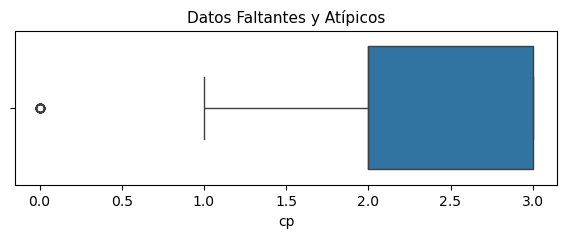

In [20]:
#Datos Atípicos1
plt.figure(figsize=(7,2))
sns.boxplot(x=Datos['cp'])
plt.title('Datos Faltantes y Atípicos', fontsize=11)

Text(0.5, 1.0, 'Datos Faltantes y Atípicos')

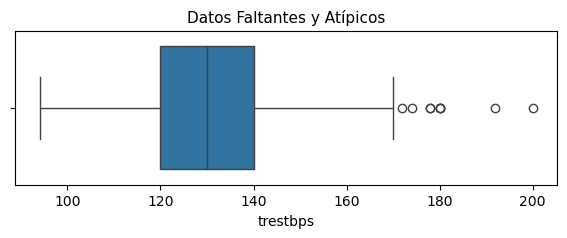

In [24]:
#Datos Atípicos2
plt.figure(figsize=(7,2))
sns.boxplot(x=Datos['trestbps'])
plt.title('Datos Faltantes y Atípicos', fontsize=11)

Text(0.5, 1.0, 'Datos Faltantes y Atípicos')

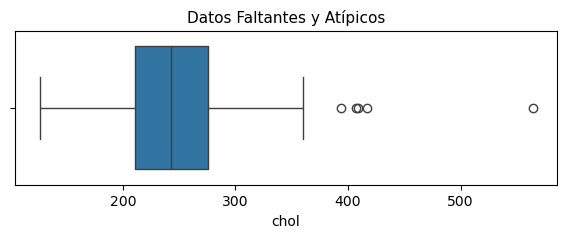

In [26]:
#Datos Atípicos3
plt.figure(figsize=(7,2))
sns.boxplot(x=Datos['chol'])
plt.title('Datos Faltantes y Atípicos', fontsize=11)

In [38]:
#2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

print ("Cantidad de registros en cero de age: ", Datos['age'].isin([0]).sum())
print ("Cantidad de registros en cero de trestbps: ",Datos['trestbps'].isin([0]).sum())
print ("Cantidad de registros en cero de chol: ", Datos['chol'].isin([0]).sum())
print ("Cantidad de registros en cero de thalach: ", Datos['thalach'].isin([0]).sum())
print ("Cantidad de registros en cero de oldpeak: ", Datos['oldpeak'].isin([0]).sum())


Cantidad de registros en cero de age:  0
Cantidad de registros en cero de trestbps:  0
Cantidad de registros en cero de chol:  0
Cantidad de registros en cero de thalach:  0
Cantidad de registros en cero de oldpeak:  96


In [42]:
Datos['oldpeak']= Datos ['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [44]:

print ("Cantidad de registros en cero de age: ", Datos['age'].isin([0]).sum())
print ("Cantidad de registros en cero de trestbps: ",Datos['trestbps'].isin([0]).sum())
print ("Cantidad de registros en cero de chol: ", Datos['chol'].isin([0]).sum())
print ("Cantidad de registros en cero de thalach: ", Datos['thalach'].isin([0]).sum())
print ("Cantidad de registros en cero de oldpeak: ", Datos['oldpeak'].isin([0]).sum())


Cantidad de registros en cero de age:  0
Cantidad de registros en cero de trestbps:  0
Cantidad de registros en cero de chol:  0
Cantidad de registros en cero de thalach:  0
Cantidad de registros en cero de oldpeak:  0


In [48]:
nivel_minimo=100
nivel_maximo=200
total_atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_atipicos))

El total de datos atipicos es 2


In [58]:
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [60]:
nivel_minimo=100
nivel_maximo=200
total_atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_atipicos))

El total de datos atipicos es 0


In [62]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        290 non-null    int64  
 1   sex        290 non-null    int64  
 2   cp         290 non-null    int64  
 3   trestbps   290 non-null    int64  
 4   chol       290 non-null    int64  
 5   fbs        290 non-null    int64  
 6   restecg    290 non-null    int64  
 7   thalach    290 non-null    int64  
 8   exang      290 non-null    int64  
 9   oldpeak    290 non-null    float64
 10  slope      290 non-null    int64  
 11  ca         290 non-null    int64  
 12  thal       290 non-null    int64  
 13  condition  290 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.0 KB


In [64]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
Datos['condition'].value_counts()

condition
0    156
1    134
Name: count, dtype: int64

In [68]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
Datos[['condition']].head(10)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [70]:
#4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

#Pocentaje datos entrenamiento 75% y para prueba 25%

#Se crea X y Y para almacenar la información de entrenamiento

X = Datos.drop('condition', axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)



In [72]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
275   45    1   3       104   208    0        2      148      1  3.000000   
22    34    1   0       118   182    0        2      174      0  1.055556   
244   54    1   3       124   266    0        2      109      1  2.200000   
87    64    1   2       140   335    0        0      158      0  1.055556   
69    35    1   1       122   192    0        0      174      0  1.055556   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
142   43    0   2       122   213    0        0      165      0  0.200000   
245   54    1   3       120   188    0        0      113      0  1.400000   
288   42    1   3       136   315    0        0      125      1  1.800000   
264   50    1   3       144   200    0        2      126      1  0.900000   
233   57    1   3       132   207    0        0      168      1  1.055556   

     slope  ca  thal  
275      1   0     0  
22       0   0     0  
244   

In [74]:
print (Y_train)

275    0
22     0
244    1
87     1
69     0
      ..
142    0
245    1
288    1
264    1
233    0
Name: condition, Length: 217, dtype: int64


In [76]:
# 5.Entrenar el modelo configurando los diferentes hiperparámetros.

#Modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

#modelos de la predicción
Prediccion = modelo_regresion.predict(X_test)

In [78]:
print (Y_test)

221    1
236    1
243    1
162    1
272    0
      ..
98     1
139    0
108    0
247    1
102    0
Name: condition, Length: 73, dtype: int64


In [80]:
print (Prediccion)

[1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0]


In [82]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.91      0.85      0.88        34

    accuracy                           0.89        73
   macro avg       0.89      0.89      0.89        73
weighted avg       0.89      0.89      0.89        73



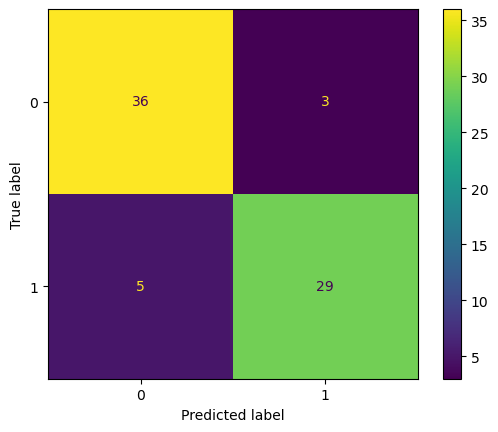

In [84]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

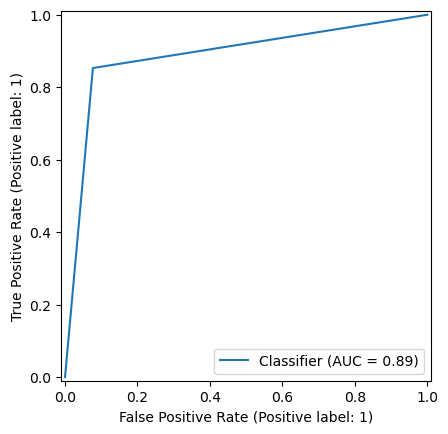

In [86]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()